## Capítulo 2: Introdução ao Scikit-learn e avaliação de modelo

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline
mpl.rcParams['figure.dpi'] = 400

In [45]:
df = pd.read_csv('Data/chapter_1_clean_dataset.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


Essa será a variável usada como resposta ao nosso modelo. Ela indica se houve pagamento no mês subsequente ou não.

Portanto, tentaremos criar um modelo para prever essa variável a partir dos dados inseridos.

Mas antes da criação do modelo, é importante fazer algumas análises para entender melhor seu comportamento e suas características.

In [46]:
df['default payment next month'].mean()

0.2217971797179718

In [47]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

Aqui temos o primeiro regressor utilizado. Ele será estudado com um conjunto de dados distinto do dataset original somente para fins didáticos. Uma vez que tenhamos compreendido como funciona uma implementação dessa natureza, poderemos usá-lo para gerar análises mais concretas com nosso dataset original.

In [48]:
my_lr = LogisticRegression()
my_lr

LogisticRegression()

In [49]:
my_new_lr = LogisticRegression()
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

Essa primeira separação tomará somente 10 valores para modelagem. Essa pequena amostragem claramente não é representativa, mas poderá ser usada de forma didática para entender o processo de predição de valores que o regressor logístico realiza.

In [50]:
X = df['EDUCATION'][0:10].values.reshape(-1, 1)
y = df['default payment next month'][0:10].values

In [51]:
my_new_lr.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

In [52]:
new_X = df['EDUCATION'][10:20].values.reshape(-1, 1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]])

In [53]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Os valores acima são os valores previstos para o pagamento levando em consideração somente as 10 primeiras entradas e somente a feature de nível educacional.

Como esses valores não são representativos dos dados e só foi considerada uma feature para análise, o resultado final não é representativo. Por isso todos os valores foram 0.

Podemos entender o que ocorreu ao entender que a maioria dos dados de entrada possui a feature 'default payment next month' como 0, o que tornou nosso modelo enviesado, encontrando uma relação simplista de que todos os dados terão essa resposta final. Abaixo podemos ver os dados reais e comparar o resultado calculado com o esperado, além de usarmos algumas métricas de avaliação posteriormente para encontrar medidas de acurácia e precisão do nosso modelo.

In [54]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

A partir daqui será gerada a massa de dados falsa para análise de alguns modelos e testes com a função matplotlib e suas aplicações.

In [55]:
np.random.seed(seed = 1)
X = np.random.uniform(low = 0, high = 10, size = (1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [56]:
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc = 0, scale = 1, size = (1000,)) + intercept

A função acima gera a massa de dados a partir de uma inclinação (slope), um intercepto (intercept) e um ruído de distribuição normal gerado pela biblioteca numpy (np.random.normal).

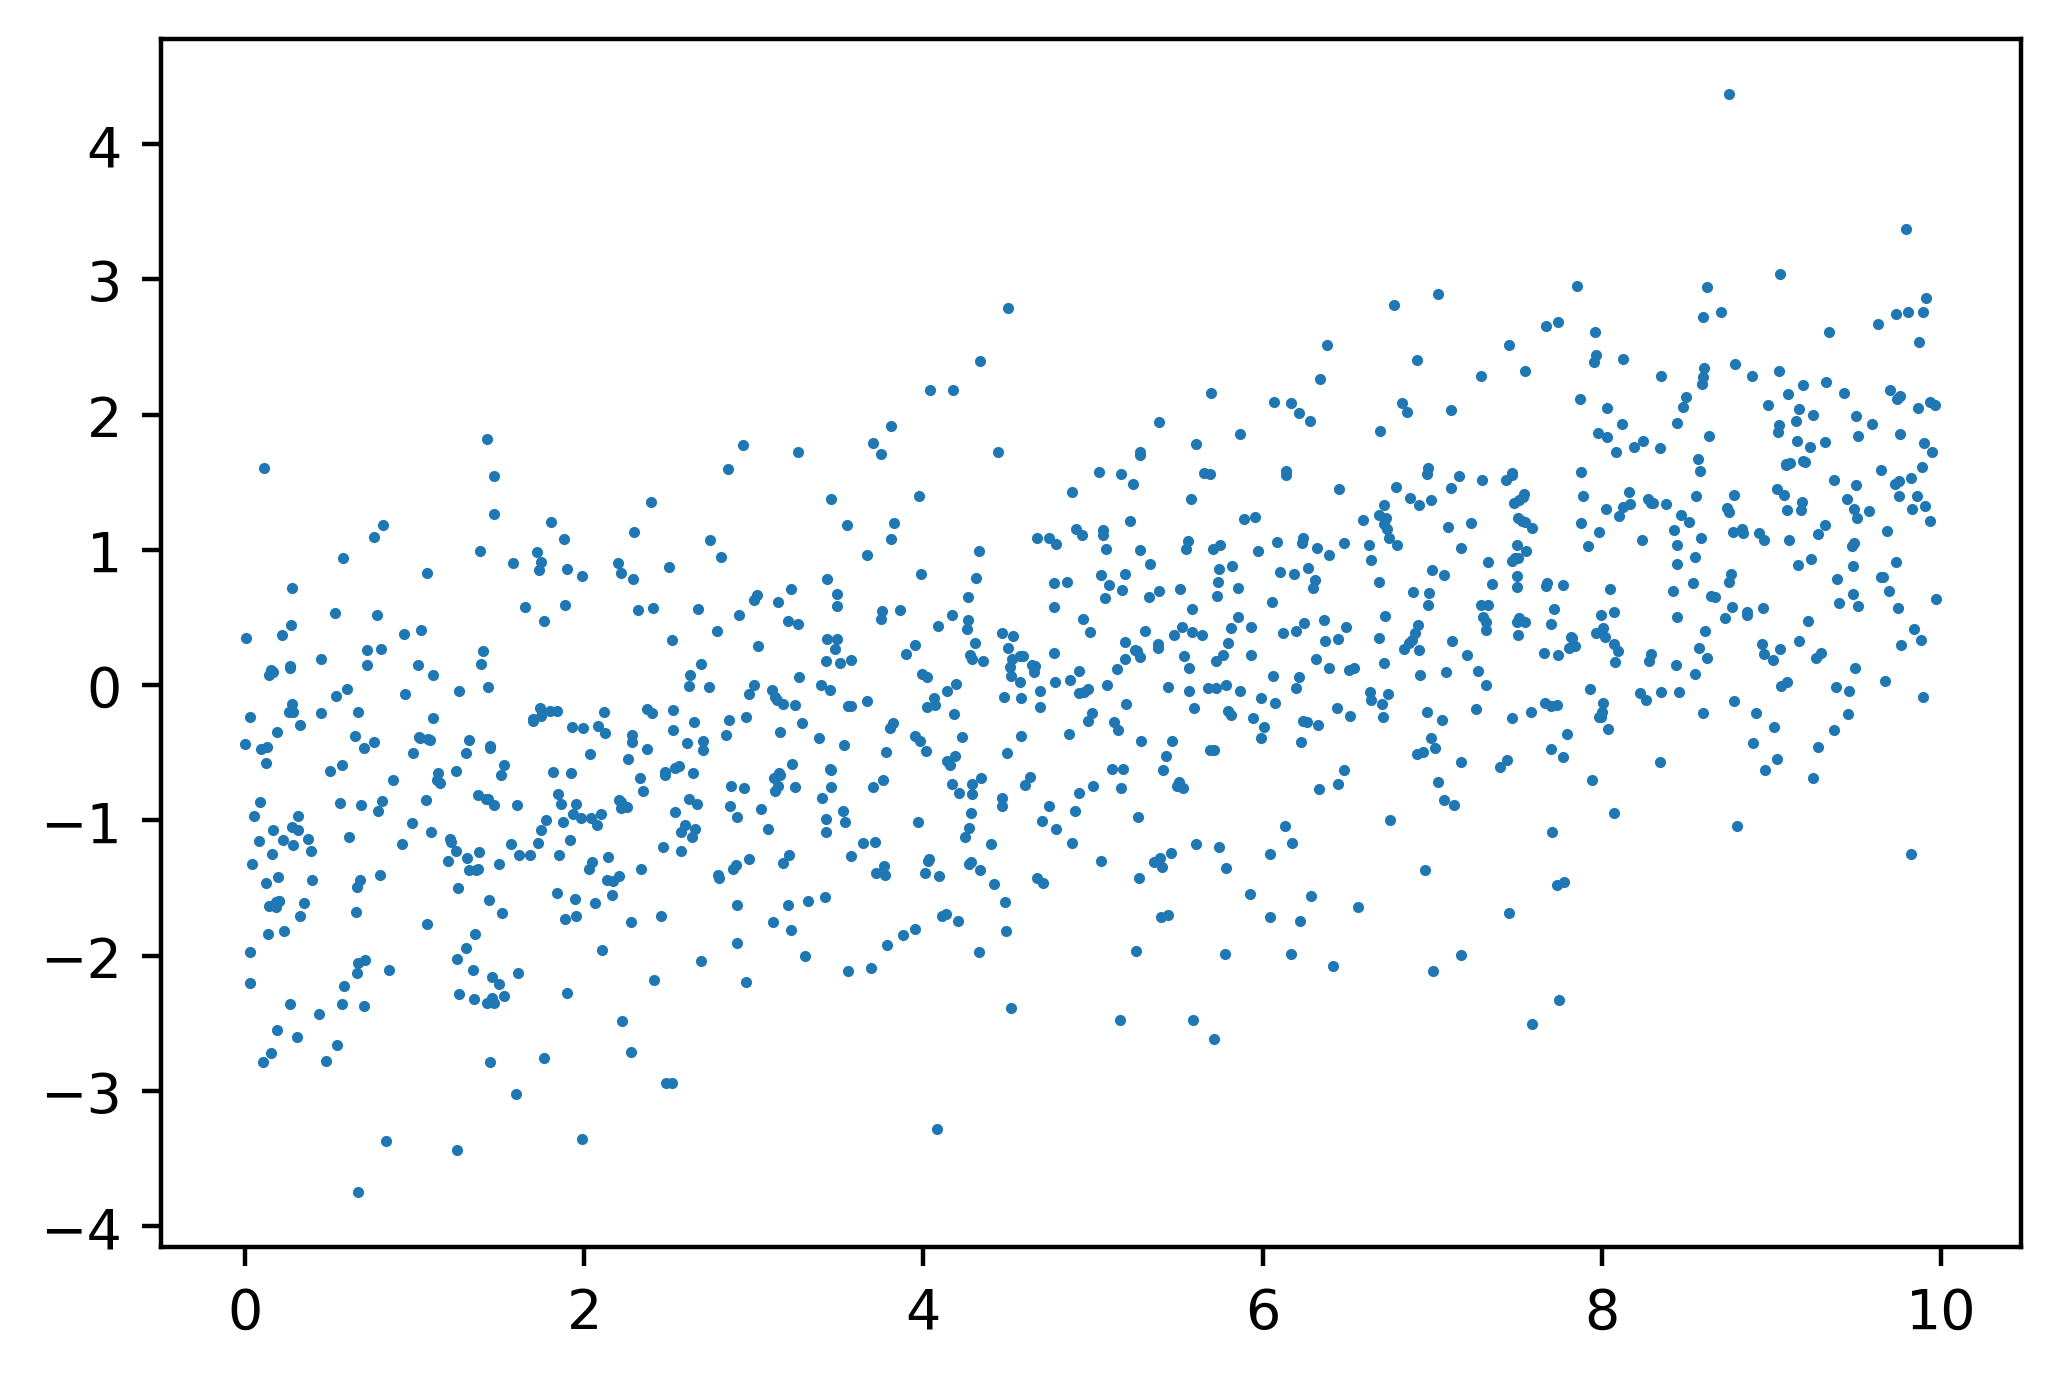

In [57]:
mpl.rcParams['figure.dpi'] = 400
plt.scatter(X, y, s = 1)

### Exercício 8

In [58]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [59]:
lin_reg.fit(X.reshape(-1, 1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.2080021895763124
[0.25106337]


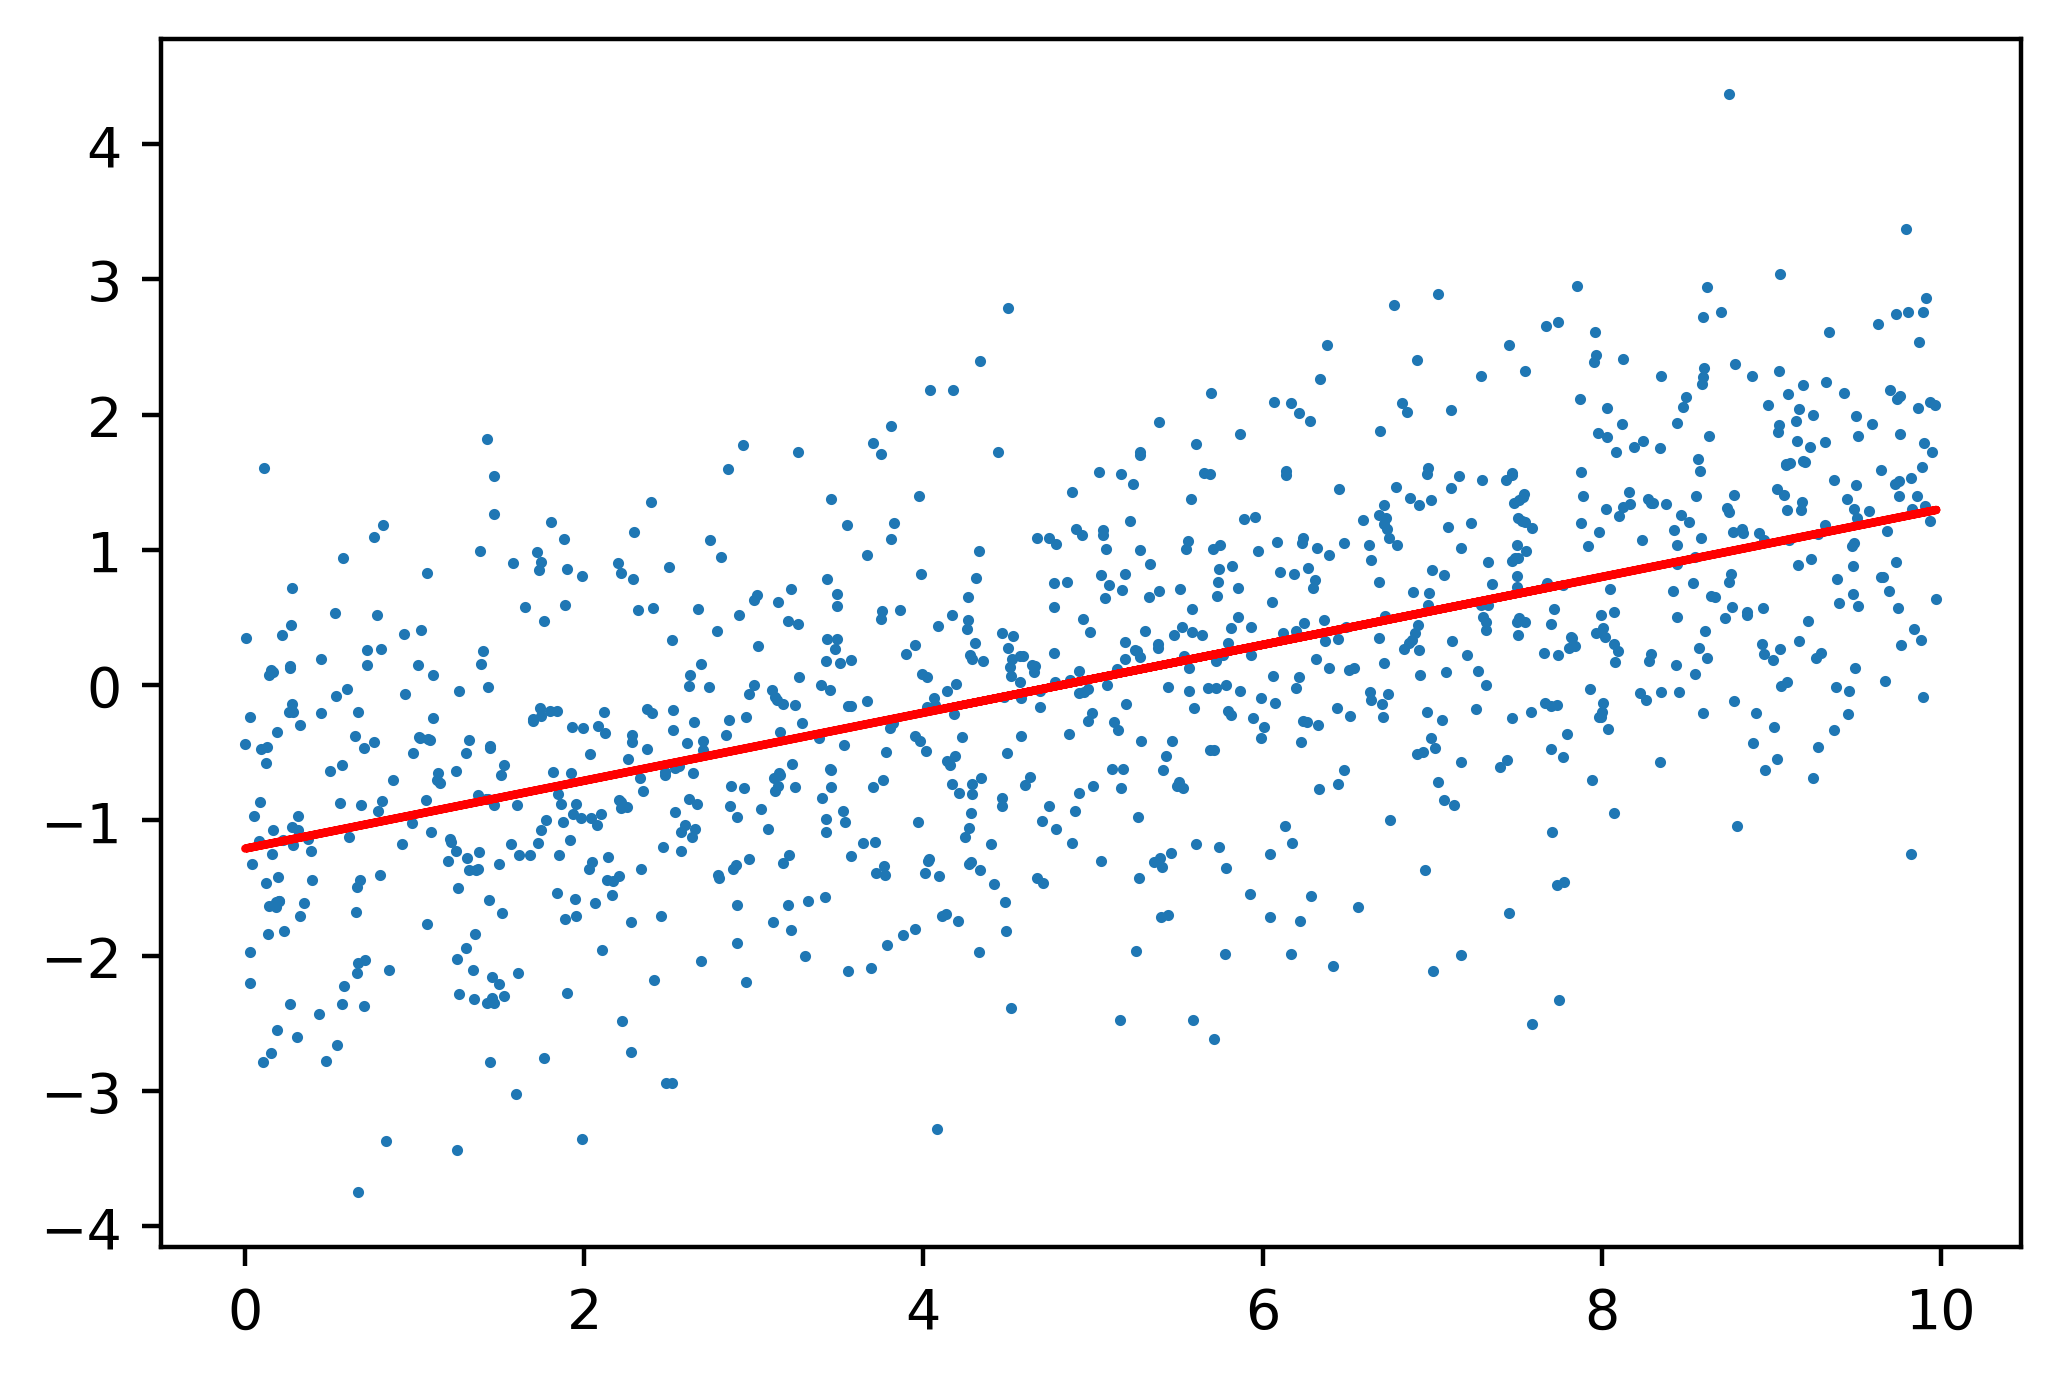

In [60]:
y_pred = lin_reg.predict(X.reshape(-1, 1))

plt.scatter(X, y, s = 1)
plt.plot(X, y_pred, 'r')

O resultado acima mostra uma linha vermelha com a função encontrada pelo regressor linear. Essa função, como pode ser vista numericamente mais acima, assumiu valores próximos para a inclinação e para o intercepto da função (-1.2 / -1.25 para o intercepto e 0.25 / 0.25 para a inclinação). O pequeno erro encontrado pode ser facilmente identificável como causado pelo ruído que foi acrescentado à massa de dados gerada.

As células abaixo utilizam o método train_test_split para separar os dados em um bloco de treino e um de teste. Esses blocos serão usados para treinar nosso modelo e testá-lo, verificando assim suas taxas de acerto.

Para a variável X, usaremos novamente a feature EDUCATION do nosso dataset, e para a variável Y usaremos a 'default payment next month'. A taxa de separação será de 20% para o teste e 80% para o treino.

Após essa separação, será usado um regressor logístico com alguns hiperparâmetros ajustados para gerar a previsão a partir dos dados separados anteriormente.

O primeiro modelo de validação será uma média dos valores acertados, que nos mostra que 78% dos valores foi previsto corretamente. Além dele, um score e um accuracy_score também são usados, todos apontando para a mesma taxa de acertos.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1, 1), df['default payment next month'].values, test_size = 0.2, random_state = 24)

In [62]:
example_lr = LogisticRegression()
example_lr.C = 0.1
example_lr.solver = 'liblinear'

example_lr.fit(X_train, y_train)
y_pred = example_lr.predict(X_test)

corretos = y_pred == y_test
np.mean(corretos)

0.7834239639977498

In [63]:
example_lr.score(X_test, y_test)

0.7834239639977498

In [64]:
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

### Exercício 9

Nesse exercício serão calculadas, manualmente, as métricas para uma matriz de confusão. Essa matriz se compõe de 8 parâmetros importantes:

P - Número de valores positivos totais
N - Número de valores negativos totais

TP - True positive - Número de positivos verdadeiros. Ou seja, quando era esperado um positivo e foi encontrado um positivo.
FN - False negative - Número de negativos falsos. Ou seja, quando era esperado um positivo e foi encontrado um negativo.

TN - True negative - Número de negativos verdadeiros. Ou seja, quando era esperado um negativo e foi encontrado um negativo.
FP - False positive - Número de positivos falsos. Ou seja, quando era esperado um negativo e foi encontrado um positivo.

TPR - True postive rate - Proporção entre TP e a quantidade total de positivos.
FNR - False negative rate - Proporção entre FN e a quantidade total de positivos.

TNR - True negative rate - Proporção entre TN e quantidade total de negativos.
FPR - False positive rate - Proporção entre FP e quantidade total de negativos.

Importante notar que essas métricas são redundantes. Ou seja, basta saber as taxas TPR e FNR ou as taxas TNR e FPR para ser capaz de montar a matriz de confusão, uma vez que elas são espelhadas e complementares.

In [65]:
P = sum(y_test)
P

1155

In [66]:
TP = sum((y_test == 1) & (y_pred == 1))
TPR = TP / P
TPR

0.0

In [67]:
FN = sum((y_test == 1) & (y_pred == 0))
FNR = FN / P
FNR

1.0

In [68]:
N = sum(y_test == 0)
N

4178

In [69]:
TN = sum((y_test == 0) & (y_pred == 0))
TN

4178

In [70]:
FP = sum((y_test == 0) & (y_pred == 1))
FP

0

In [71]:
TNR = TN / N
FPR = FP / N

print('A taxa de True negative é {} e a False positive é {}'.format(TNR, FPR))

A taxa de True negative é 1.0 e a False positive é 0.0


A biblioteca sklearn oferece a função metrics.confusion_matrix, que permite calcular a matriz de confusão automaticamente, sem haver a necessidade de cálculo de cada variável de modo independente.
Ao fazer a matriz dessa forma, podemos ler o resultado como:

TN FP

FN TP

Sendo, mais uma vez, TN o True Negative, FP o False Positive, FN o False Negative e TP o True Positive.
Os valores apresentados estão em sua forma absoluta e não em valores relativos.

In [72]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])

### Exercício 10

Um modelo de regressão logística atua gerando um valor de probabilidade de que o dado esteja em cada classe possível. Ou seja, se a classificação é binária (como é o caso do modelo atual), o modelo analisará a entrada e classificará a probabilidade dele ser categorizado como um postivio (0) ou um negativo (1). Essa classificação será feita para cada entrada e o resultado final é uma matriz Nx2, sendo N o número de linhas do dataset que está sendo analisado e 2 pois a classificação é binária. Importante notar também que, para cada linha dessa matriz, a soma de todos os elementos tem que ser igual a 1 (o que indica que o dado tem que ser categorizado em alguma daquelas características possíveis). Essa verificação será feita logo em seguida.

Caso a classificação não seja binária, a lógica será a mesma, mas cada coluna da matriz gerada representará a probabilidade do dado estar dentro daquela categoria. Por exemplo, caso a classificação possível seja entre 4 classes, a matriz gerada será Nx4.

In [73]:
probabilidade_prevista_y = example_lr.predict_proba(X_test)
probabilidade_prevista_y

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [74]:
soma_das_probabilidades = np.sum(probabilidade_prevista_y, 1)
soma_das_probabilidades

array([1., 1., 1., ..., 1., 1., 1.])

In [75]:
soma_das_probabilidades.shape

(5333,)

In [76]:
np.unique(soma_das_probabilidades)

array([1.])

Até aqui foi possível ver que a variável probabilidade_prevista_y tem linhas que somam 1 em toda sua extensão (tal como esperado) e tem tamanho 5333, respeitando a seleção de 80/20 feito acima para dados de treino e dados de teste.

Aqui serão verificadas as probabilidades que foram encontradas de que cada classe caia numa classificação positiva (0). Ou seja, do array probabilidade_prevista_y, tomaremos somente a primeira coluna, que representa a probabilidade de cada linha ser classificada como positiva. Essa classificação naturalmente estará entre 0 e 1 e, quanto mais próxima de 1, mais provável é daquele dado ser categorizado como positivo.

In [77]:
probabilidades_positivas = probabilidade_prevista_y[:, 1]
probabilidades_positivas

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

O gráfico abaixo contém algumas informações importantes.
Primeiro, podemos ver que ele possui somente 4 bins. Isso está de acordo com o fato de que a previsão foi feita considerando somente o nível educacional dos clientes e esse, por sua vez, se separa em 4 categorias.
Além disso, vemos uma predominância do segundo bin, o que indica que a quantidade de clientes com nível educacional classificado como 1 é a maior, seguido do nível 0, depois 2 e por último 3. Isto também está de acordo com nossos dados originais.
O eixo X representa a probabilidade daquela classe ser classificada como 0 (positiva). Ou seja, os clientes cujo nível educacional está na classe 3, por exemplo, tem uma probabilidade de aproximadamente 0.24 de estarem como positivos e, por consequência, 0.76 de serem classificados como negativos.

Importante notar que o regressor logístico tem uma separação em 0.5. Ou seja, se a probabilidade da classe ser positiva for superior a 0.5, ela será classificada como positiva. Caso contrário, será classificada como negativa. Tendo isso em vista, podemos perceber que todos os dados possuem uma probabilidade inferior a 0.5 (sendo a mais alta aproximadamente 0.26) de ser negativa. Por isso o modelo irá classificar todos os dados como negativo. Isso claramente não reflete a realidade e mostra um modelo muito pouco eficiente para nossos dados.

Das muitas causas para esse número pouco expressivo, podemos destacar alguns fatores: 
1) o conjunto de dados não está balanceado nas classes. Há muitos dados dentro da classe 0 e poucos dentro da classe 1. De fato, 78% dos dados estão categorizados como 0. Isso gera uma distorção e uma tendência no modelo que se torna mais propenso a detectar um tipo de classe do que outro.
2) o modelo só leva em conta uma informação. Como dito no notebook do primeiro capítulo, nosso modelo considera somente uma feature para gerar o modelo final: o nível educacional. Por mais que essa variável possa ter alguma representação final, ela sozinha é incapaz de prever se o cliente ficará inadimplente ou não. São necessárias mais informações para gerar essa predição.

Text(0, 0.5, 'Número de amostras')

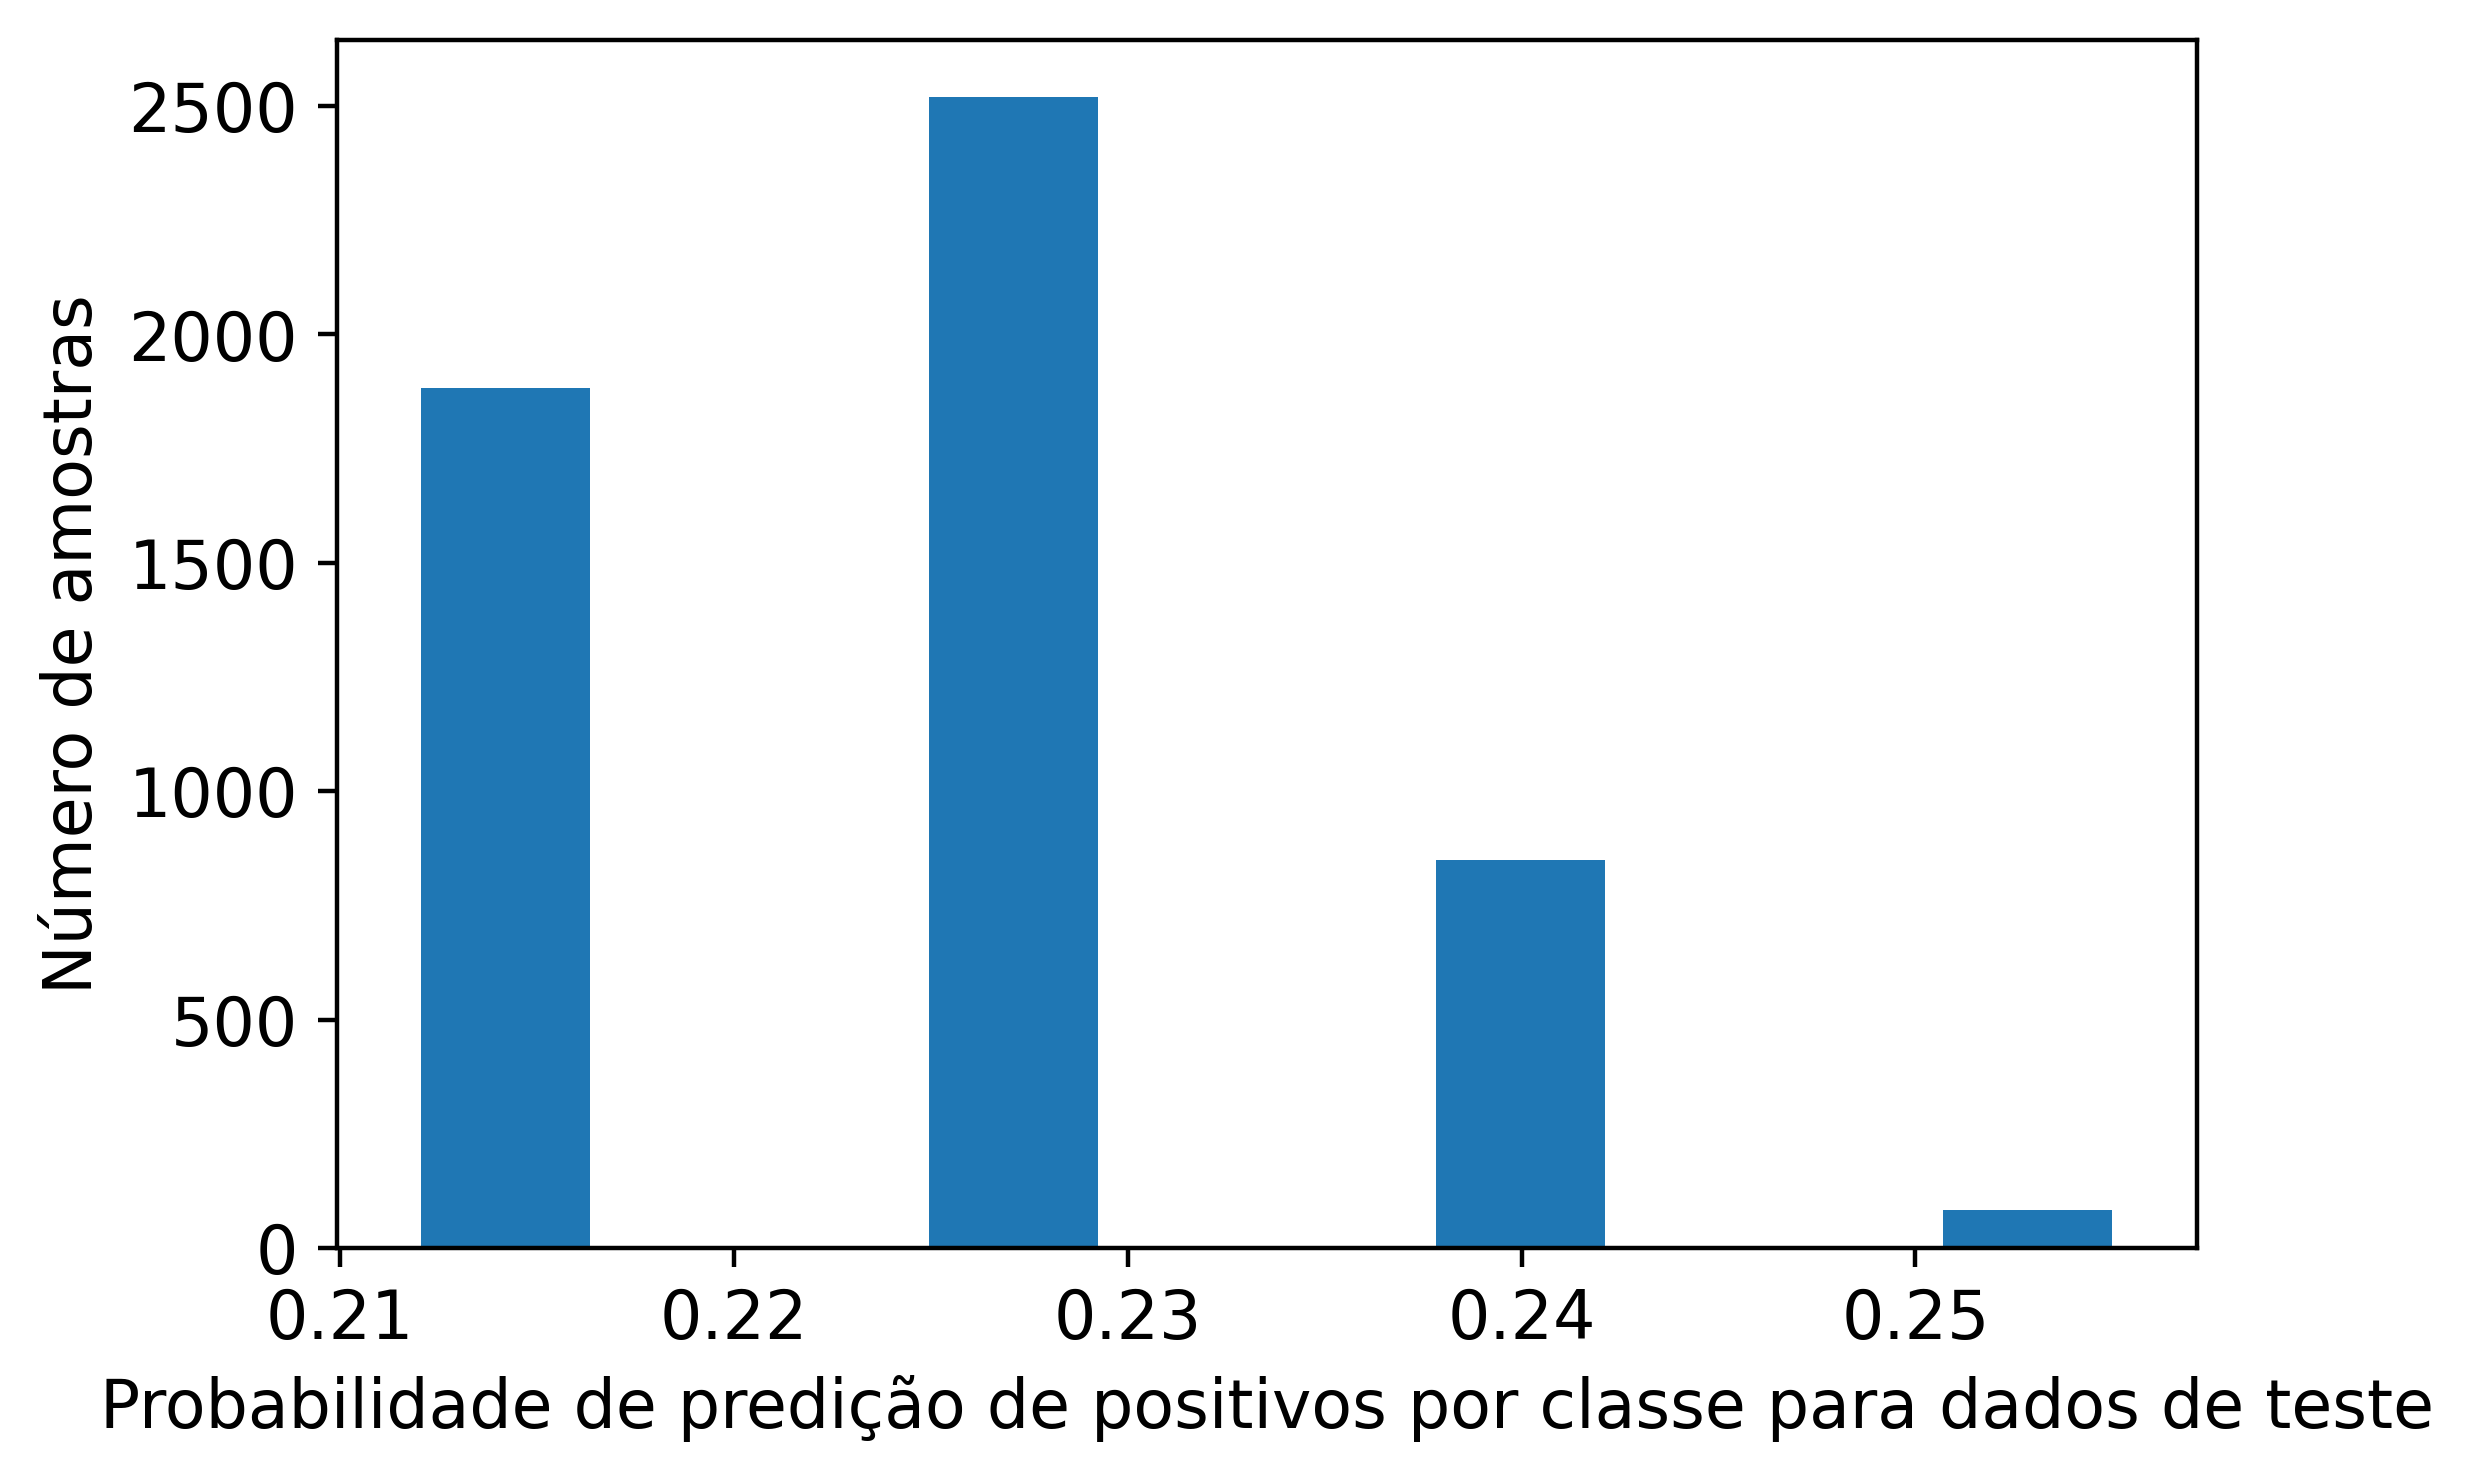

In [78]:
mpl.rcParams['font.size'] = 12
plt.hist(probabilidades_positivas)
plt.xlabel('Probabilidade de predição de positivos por classe para dados de teste')
plt.ylabel('Número de amostras')

In [79]:
probabilidade_positiva_dado_positivo = probabilidades_positivas[y_test == 1]
probabilidade_positiva_dado_negativo = probabilidades_positivas[y_test == 0]

Text(0, 0.5, 'Número de amostras')

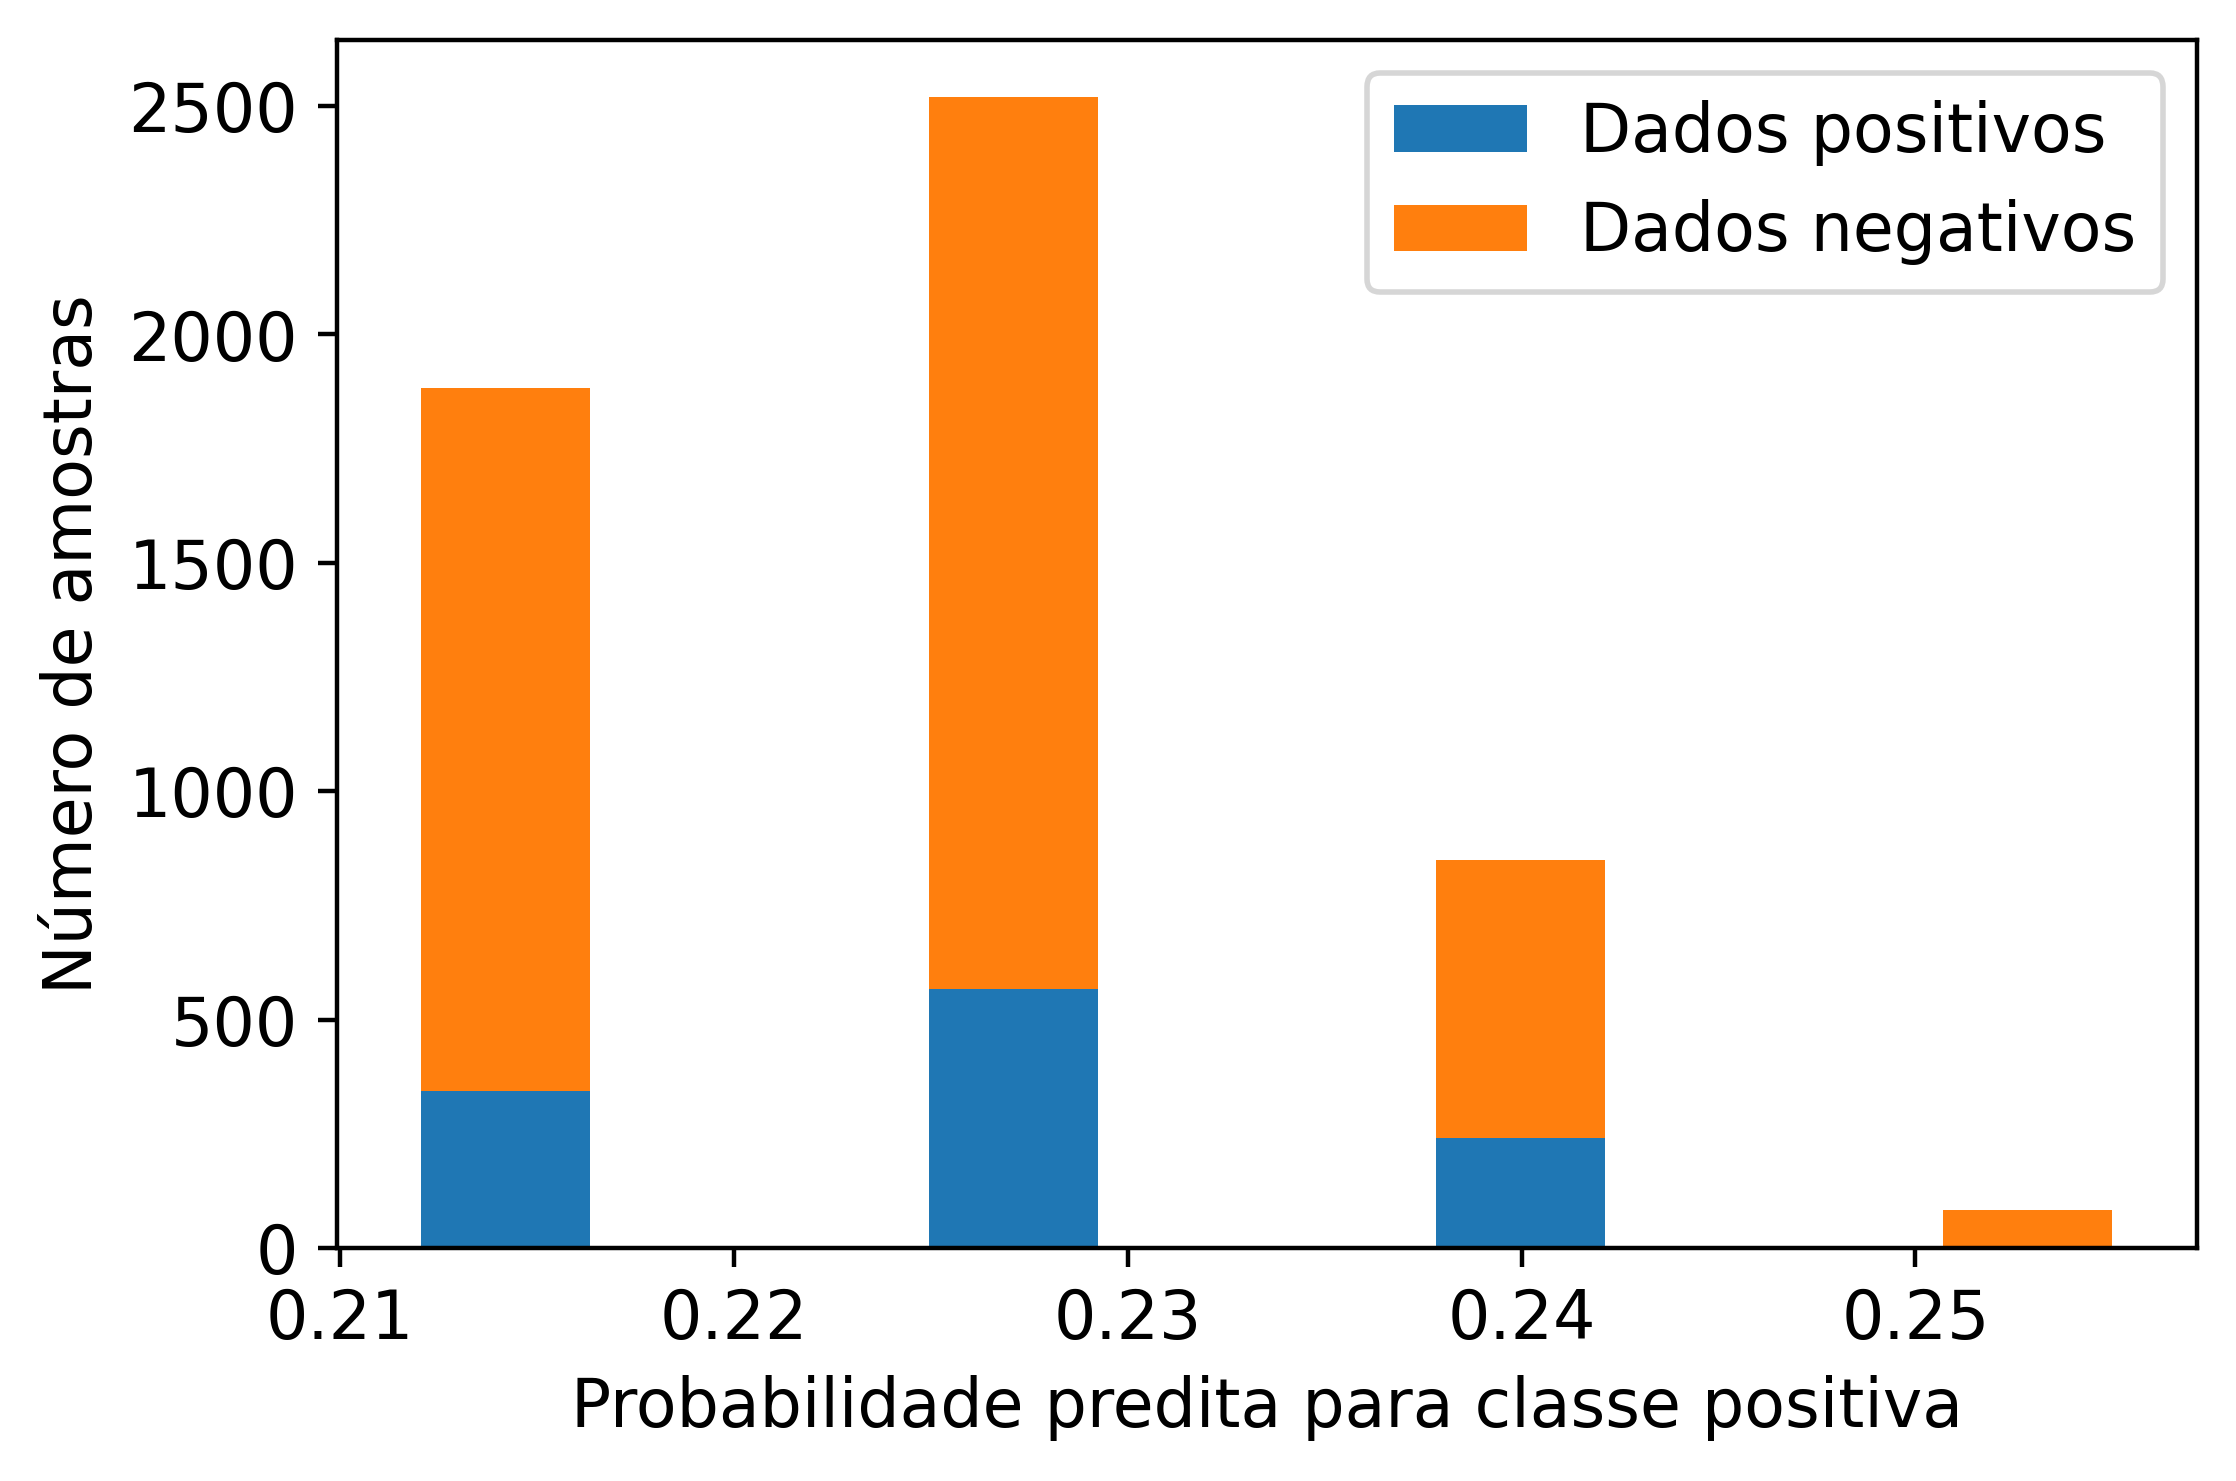

In [80]:
plt.hist([probabilidade_positiva_dado_positivo, probabilidade_positiva_dado_negativo], histtype = 'barstacked')
plt.legend(['Dados positivos', 'Dados negativos'])
plt.xlabel('Probabilidade predita para classe positiva')
plt.ylabel('Número de amostras')

Como podemos ler e interpretar esse gráfico:

Cada bin, como visto anteriormente, representa um nível educacional (de 0 a 3). A probabilidade no eixo X mostra a chance de que cada classe seja categorizada como positiva. Como podemos ver, todas estão abaixo do limiar de 0.5, logo todos serão categorizados como negativos.

O que temos de diferencial desse gráfico pro anterior é que é possível vermos nesse os dados que são, de fato, negativos e os que são positivos (essa separação está feita pelas cores do gráfico). Uma conclusão que tiramos aqui é que todos os clientes com nível educacional maior deveriam ser classificados como negativos e assim foram. Isso mostra que para essa parcela da amostragem, o modelo representou com perfeição a realidade.

Para os outros grupos, há uma mescla de dados positivos e negativos. Isso deixa ainda mais claro como será necessário mais informação para conseguir separar essas categorias de um modo mais fiel.

### ROC curve

Text(0.5, 1.0, 'ROC Curve')

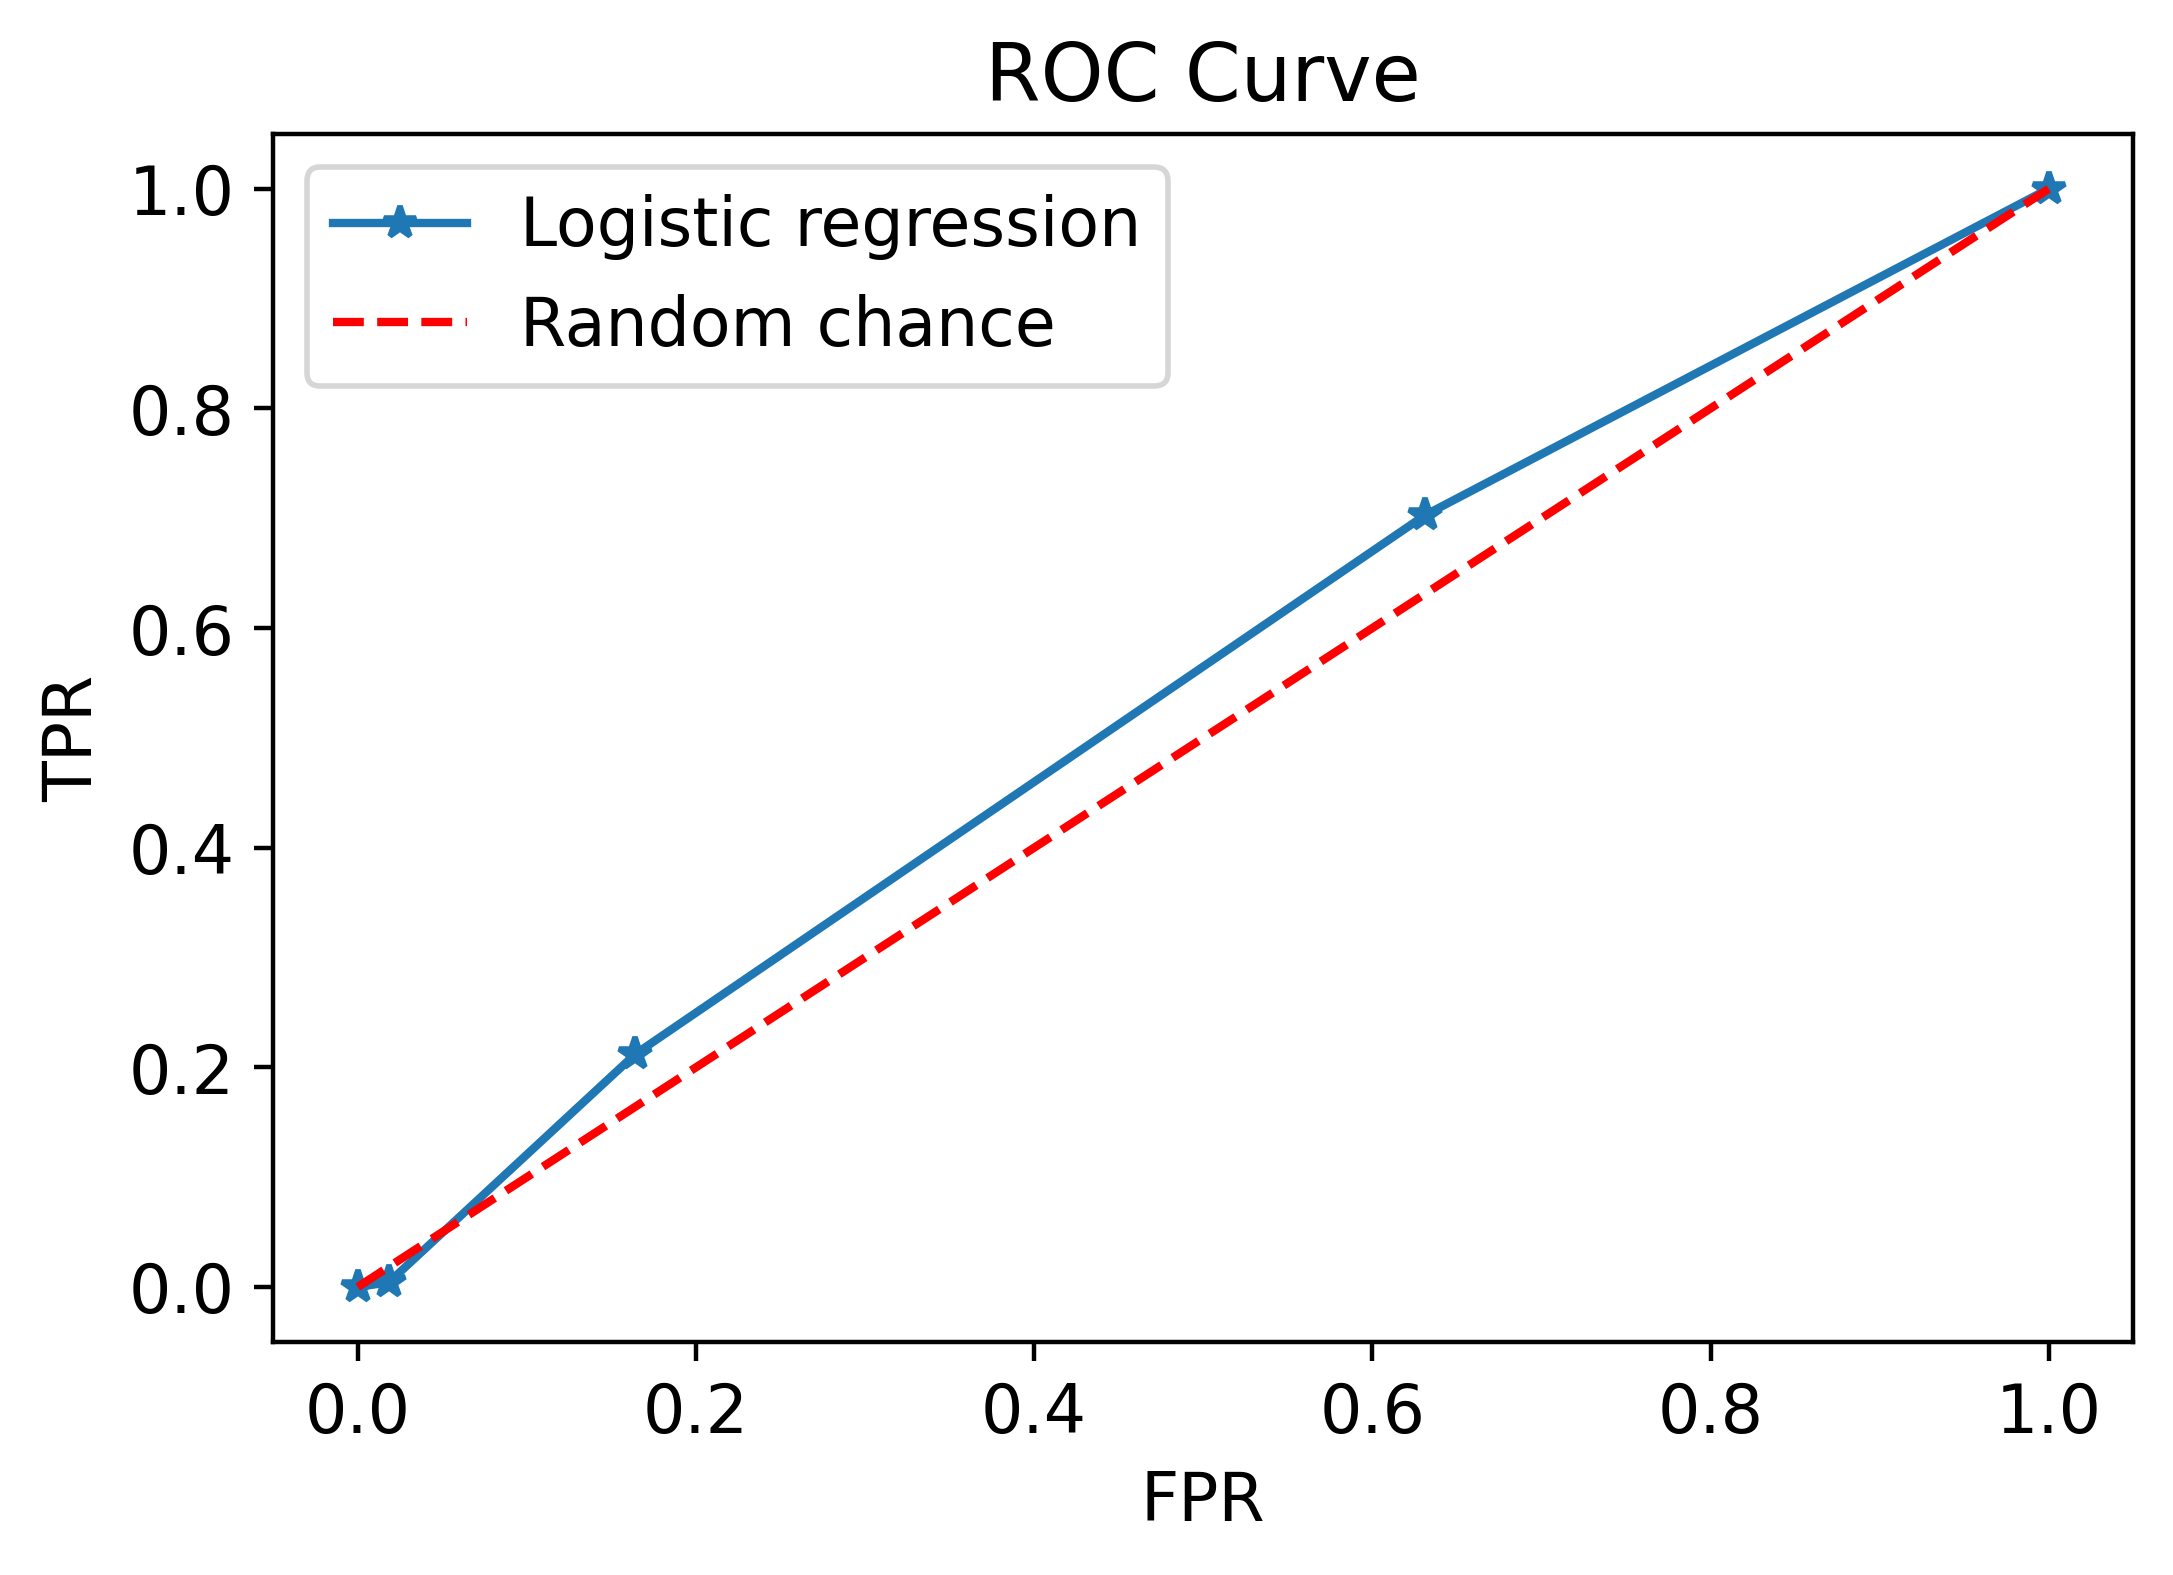

In [81]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probabilidades_positivas)

plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

A curva ROC (ou Característica de operação do receptor) é uma curva que mostra como nosso modelo se comportará ao alterar o limiar de separação entre as classes.

No eixo X temos a FPR, ou False Positive Rate, ou ainda taxa de falso positivo. Essa métrica nos mostra a proporção de falsos positivos encontrados no modelo.
No eixo Y temos a TPR, ou True Positive Rate, ou ainda taxa de verdadeiro positivo. Essa métrica nos mostra a proporção de positivos verdadeiros encontrados pelo modelo.

As duas linhas que formam o gráfico são a taxa mínima esperada (de vermelho) e a taxa encontrada de fato (azul). Como podemos ver, um modelo aleatório teria uma taxa de acerto que seguiria com a curva vermelha. Assim, quanto maior o limiar de separação entre um positivo e um negativo, mais TRP e mais FPR, até o limite onde tudo seria classificado como positivo (o ponto mais acima e a direita). É esperado então que nosso modelo possua uma curva mais inclinada para cima, com uma barriga mais acentuada. Isso indica um modelo que é capaz de gerar cada vez mais postivos verdadeiros (TPR) sem o custo de gerar mais positivos falsos (FPR). Num caso ideal, a curva teria o formato de um L de ponta cabeça. Nesse caso, teríamos uma TPR de 1 e uma FPR de 0. Ou seja, os positivos verdadeiros seriam encontrados sem qualquer falso positivo.

É possível também realizar um cálculo da curva ROC onde o valor da integral da curva nos dará uma medida entre 0 e 1 (onde sempre desejamentos que seja maior do que 0.5, no mínimo). Esse valor é chamado ROC AUC, ou área sob a curva de característica de operação do receptor.

In [82]:
auc_score = metrics.roc_auc_score(y_test, probabilidades_positivas)
auc_score

0.5434650477972642